# Puja Pramod Pathak

### Aim :

To predict the percentage of an student based on the no. of study hours

### Flow of Analysis

**1. Import the required libraries** <br>
**2. Read and understand the data** <br>
**3. Exploratory Data Analysis**<br>
**4. Linear Regression Model Building**<br>
**5. Making Predictions for Test data**<br>
**6. Calculating R-squared value**<br>
**7. Model Equation**<br>
**8. What will be predicted score if a student studies for 9.25 hrs/ day?** 

### 1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

---

### 2. Read and Understand Data

In [5]:
df = pd.read_csv("http://bit.ly/w-data")

In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
df.shape

(25, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**The basic analysis of the data shows that:**<br><br>
**1. There are 25 rows and 2 columns.**<br>
**2. There are no null values in the data.**<br>
**3. The data types of both the columns are in oreder.**<br>
**4. Hours column - min value 1.1hrs and max value 9.2hrs.**<br>
**5. Scores column - min value 17% and max value 95%.**

---

### 3. Exploratory Data Analysis

**3.1 Outliers**

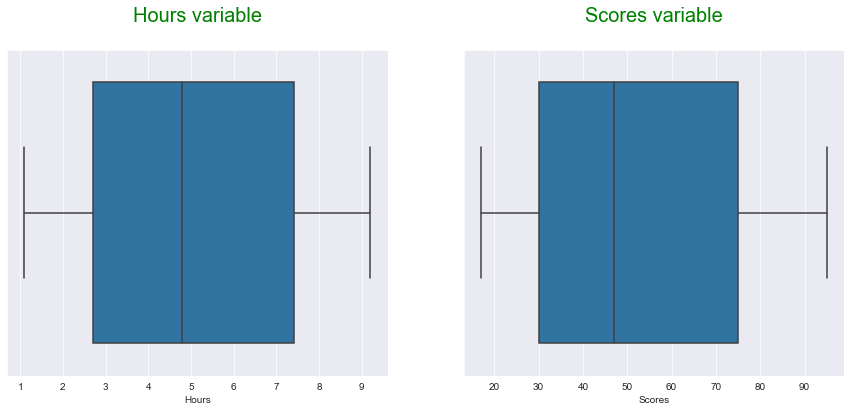

In [15]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(df["Hours"])
plt.title("Hours variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
sns.boxplot(df["Scores"])
plt.title("Scores variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

**Inference : There are no outliers in both the Hours and Scores Columns**

**3.2 Univariate Analysis**

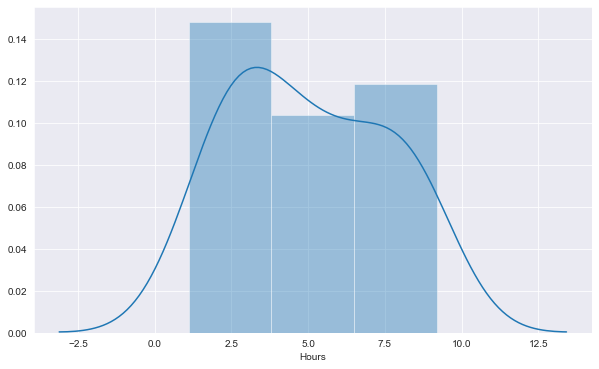

In [20]:
# Hours variable distribution

plt.figure(figsize=(10,6))
sns.distplot(df["Hours"])
plt.show()

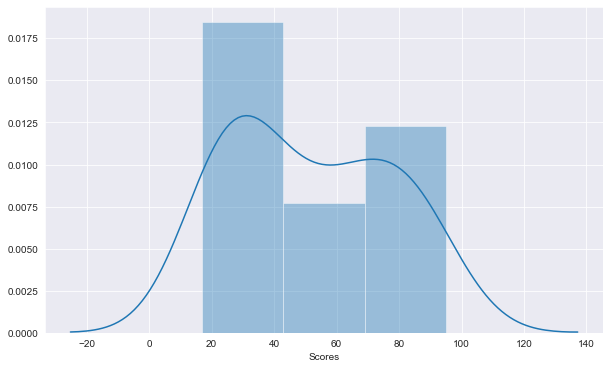

In [21]:
# Scores variable distribution

plt.figure(figsize=(10,6))
sns.distplot(df["Scores"])
plt.show()

**3.3 Bivariate Analysis**

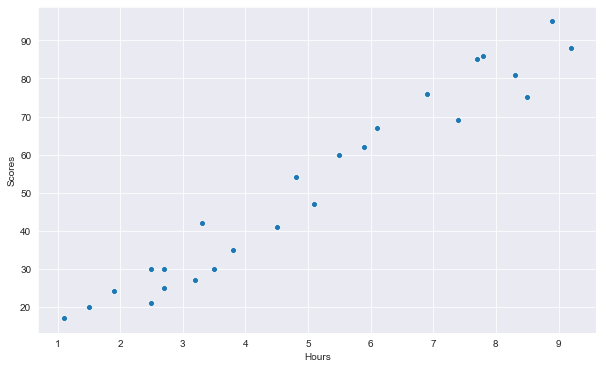

In [22]:
# Scores v/s Hours scatter plot

plt.figure(figsize=(10,6))
sns.scatterplot(df["Hours"], df["Scores"])
plt.show()

**Inference : We can see that there is a linear relationship between the Hours and Scores Variables. **

---

### 4. Linear Regression Model Building

**From EDA, we have seen that Scores variable is linearly related to Hours variable. Hence we can build a Linear Regression Model on this data with Hours as predictor/independent variable and Scores as target/dependent variable**

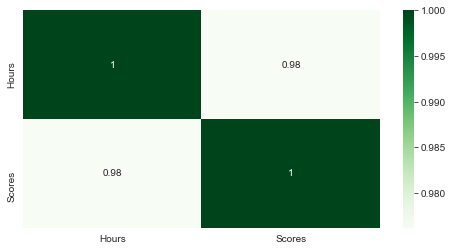

In [24]:
# Heatmap for correlation of variables

plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), cmap = "Greens", annot = True)
plt.show()

**Inference : There is high correlation in Hours and Scores variables**

**4.1 Split the data set into df_train and df_test**

In [31]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
df_train.shape

(17, 2)

In [33]:
df_test.shape

(8, 2)

**4.2 Build the Linear Regression Model**

In [34]:
y_train = df_train.pop("Scores")
X_train = df_train

In [36]:
X_train.head()

,Hours
6,9.2
12,4.5
4,3.5
24,7.8
0,2.5


In [37]:
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

**We are using statsmodels library which fits the linear regression line for the data passing through origin (0,0). So we add a constant term to X_train**

In [38]:
X_train_sm = sm.add_constant(X_train)

In [39]:
lr = sm.OLS(y_train, X_train_sm).fit()  # create instance lr

In [40]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Mon, 03 May 2021   Prob (F-statistic):           1.15e-11
Time:                        15:36:56   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Our model is ready<br>
**1. R-squared value 0.957 and adjusted R-squared value 0.954.**<br>
**2. P-value of F-statistic very low, almost close to 0.**<br>


**4.3 Residual Analysis of train data**

In [41]:
y_train_pred = lr.predict(X_train_sm)  # Predictiong the values for train data - y_train_pred

In [42]:
y_train_pred.head()

6     92.314915
12    45.917857
4     36.046143
24    78.494515
0     26.174428
dtype: float64

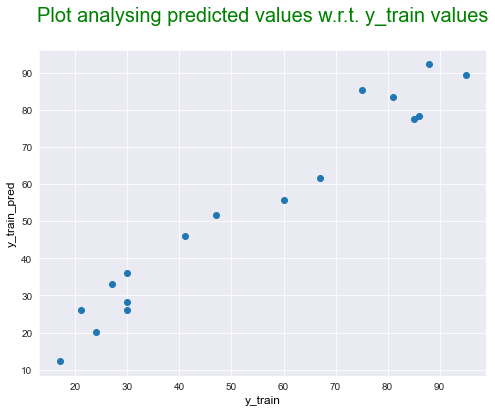

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred)
plt.title("Plot analysing predicted values w.r.t. y_train values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_train", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("y_train_pred", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [44]:
res = y_train - y_train_pred  # Calculate the residuals

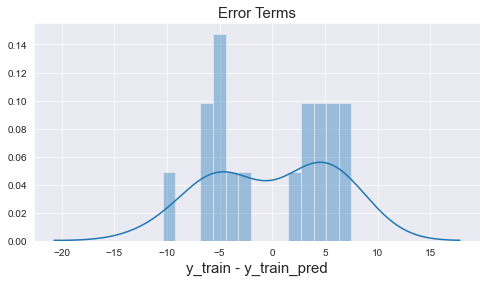

In [45]:
plt.figure(figsize=(8,4))
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

**Inference :**<br>
**1. Scatter plot of y_train and y_train_pred shows that our model has predicted the values very well for train   
data.**<br>
            **2. The distribution plot shows that error terms are normally distributed.**

---

### 5. Making Predictions for Test data

In [46]:
y_test = df_test.pop("Scores")
X_test = df_test

In [47]:
X_test_sm = sm.add_constant(X_test)     # add a constant

In [48]:
# Making predictions
y_test_pred = lr.predict(X_test_sm)

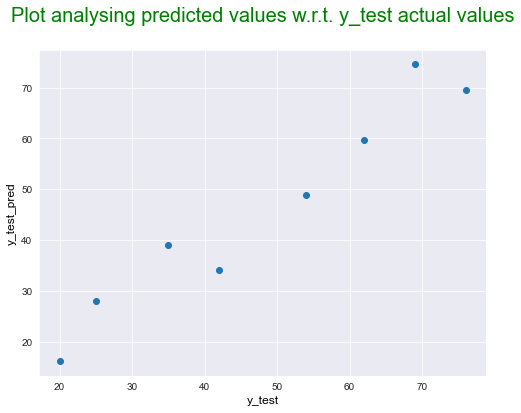

In [49]:
# Scatter plot for y_test and y_test_pred
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred)
plt.title("Plot analysing predicted values w.r.t. y_test actual values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("y_test_pred", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [50]:
res_test = y_test - y_test_pred      # Calculate the residuals

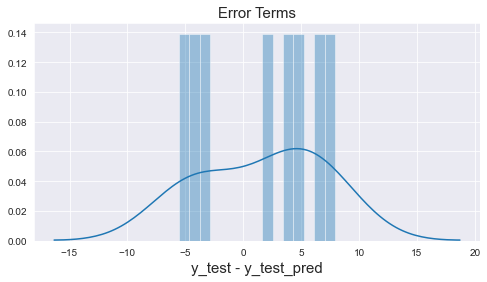

In [51]:
# Distribution of error terms

plt.figure(figsize=(8,4))
sns.distplot(res_test, bins = 15)
plt.title('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - y_test_pred', fontsize = 15)         # X-label
plt.show()

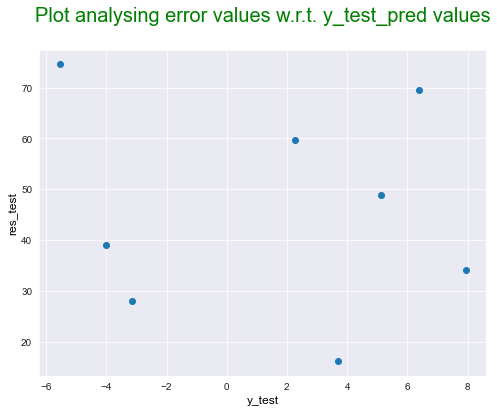

In [52]:
# Scatter plot for res_test and y_test_pred
plt.figure(figsize=(8,6))
plt.scatter(res_test, y_test_pred)
plt.title("Plot analysing error values w.r.t. y_test_pred values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("res_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

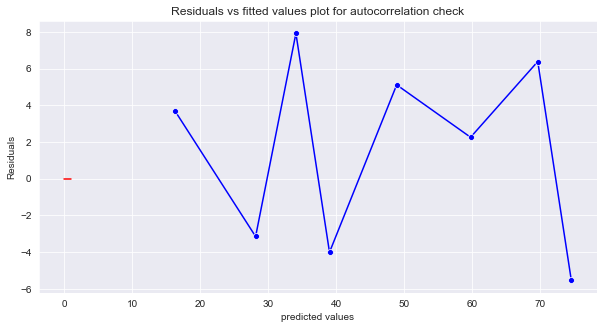

In [73]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_test_pred,res_test,marker='o',color='blue')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

**Inference :**<br>
**1. Scatter plot of y_test and y_test_pred shows that our model has predicted the values very well for test   
data.**<br>
            **2. The distribution plot shows that error terms for test data follow normal distribution.**<br>
            **3. Scatter plot of residuals and y_test_pred shows that there is no pattern in error terms. This confirms the homoscedasticity assumption of linear regression.**<br>
            **4. Line plot of residuals shows that they are independent that means there is no correlation between them and are distributed around mean 0.**

---

### 6. Calculating R-squared value

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.9309458862687439

### R-squared values for Train and Test data :
**1. Train data - R-squared value : 0.957**<br>
**2. Test data - R-squared value : 0.931**

### Our Model is ready and all assumptions of Linear Regression are verified successfully.

---

### 7. Model Equation

In [75]:
lr.params

const    1.495142
Hours    9.871714
dtype: float64

### Scores = 1.495142 + (9.871714 x Hours)

---

### 8. What will be predicted score if a student studies for 9.25 hrs/ day?

In [76]:
Score = 1.495142 + (9.871714 * 9.25)

In [77]:
print(Score)

92.8084965


#### Or

In [81]:
hr = np.array([1.0, 9.25])

In [82]:
lr.predict(hr)

array([92.80850057])

### The predicted score if a student studies for 9.25 hrs/ day is 92.8%

***

# Our Analysis is Complete. Thank You.